<ipython-input-25-a2d6fd5cc841>:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weighted_scores = df.applymap(lambda x: 10 - x)


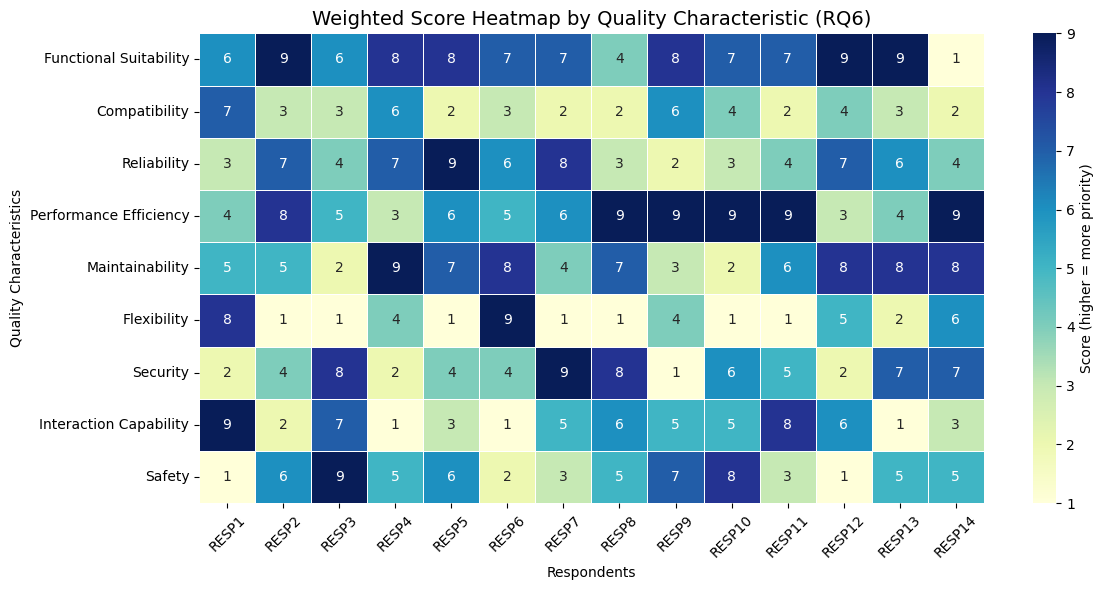


Weighted Ranking of Quality Characteristics (RQ6):
Quality Characteristic  Total Score  Rank
Functional Suitability           96     1
Performance Efficiency           89     2
       Maintainability           82     3
           Reliability           73     4
              Security           69     5
                Safety           66     6
Interaction Capability           62     7
         Compatibility           49     8
           Flexibility           45     9


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Updated table data with ISO/IEC 25010:2023 quality characteristics
data = {
    "Functional Suitability": [4,1,4,2,2,3,3,6,2,3,3,1,1,9],
    "Compatibility": [3,7,7,4,8,7,8,8,4,6,8,6,7,8],
    "Reliability": [7,3,6,3,1,4,2,7,8,7,6,3,4,6],
    "Performance Efficiency": [6,2,5,7,4,5,4,1,1,1,1,7,6,1],
    "Maintainability": [5,5,8,1,3,2,6,3,7,8,4,2,2,2],
    "Flexibility": [2,9,9,6,9,1,9,9,6,9,9,5,8,4],
    "Security": [8,6,2,8,6,6,1,2,9,4,5,8,3,3],
    "Interaction Capability": [1,8,3,9,7,9,5,4,5,5,2,4,9,7],
    "Safety": [9,4,1,5,4,8,7,5,3,2,7,9,5,5],
}

respondents = [f"RESP{i+1}" for i in range(14)]
df = pd.DataFrame(data, index=respondents).T

# Step 1: Compute weighted score (priority 1 = 9 points, ..., priority 9 = 1 point)
weighted_scores = df.applymap(lambda x: 10 - x)

# Step 2: Sum points per characteristic
total_scores = weighted_scores.sum(axis=1).sort_values(ascending=False)

# Step 3: Build ranking DataFrame
ranking_df = total_scores.reset_index()
ranking_df.columns = ['Quality Characteristic', 'Total Score']
ranking_df['Rank'] = ranking_df['Total Score'].rank(ascending=False, method='min').astype(int)
ranking_df = ranking_df.sort_values(by='Rank')

# Step 4: Generate heatmap of weighted scores
plt.figure(figsize=(12, 6))
sns.heatmap(weighted_scores, annot=True, cmap="YlGnBu",
            cbar_kws={'label': 'Score (higher = more priority)'},
            linewidths=0.5)
plt.title("Weighted Score Heatmap by Quality Characteristic (RQ6)", fontsize=14)
plt.xlabel("Respondents")
plt.ylabel("Quality Characteristics")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("heatmap_weighted_rq6.png")
plt.show()

# Step 5: Print the final ranking
print("\nWeighted Ranking of Quality Characteristics (RQ6):")
print(ranking_df.to_string(index=False))

